In [2]:
import os
import sys

# Force Spark to use the exact Python executable running this notebook
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

# Point to your Spark installation
os.environ['SPARK_HOME'] = r'C:\spark'

# Windows-specific: Spark needs Hadoop binaries (winutils.exe)
# Ensure you have winutils.exe in C:\hadoop\bin
os.environ['HADOOP_HOME'] = r'C:\hadoop' 
os.environ['PATH'] += os.pathsep + r'C:\hadoop\bin'

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("VentasFix") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.kryoserializer.buffer.max", "512m") \
    .config("spark.driver.extraJavaOptions", 
            "--add-opens=java.base/java.nio=ALL-UNNAMED " +
            "--add-opens=java.base/sun.nio.ch=ALL-UNNAMED") \
    .config("spark.executor.extraJavaOptions", 
            "--add-opens=java.base/java.nio=ALL-UNNAMED " +
            "--add-opens=java.base/sun.nio.ch=ALL-UNNAMED") \
    .getOrCreate()

sc = spark.sparkContext


In [3]:
from pyspark import SparkContext

In [4]:
import os
os.environ['HADOOP_HOME'] = "C:/hadoop"
os.environ['PATH'] += r";C:\hadoop\bin"

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [6]:
df = spark.read.parquet("C:/Users/gema2/OneDrive/Escritorio/MAESTRIA/DatosMasivos/yellow_tripdata_2025-01.parquet")

In [7]:
from pyspark.sql.functions import col, year, month, dayofmonth, date_format, unix_timestamp

## Preprocesamiento

In [8]:
df = df.withColumn('duracion_viaje',(unix_timestamp(col('tpep_dropoff_datetime'))-unix_timestamp(col('tpep_pickup_datetime')))/60)

In [9]:
df = df.drop('RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID')

In [10]:
df = df.withColumn('año',year(col('tpep_pickup_datetime')))

In [11]:
df = df.withColumn('día',dayofmonth(col('tpep_pickup_datetime')))

In [12]:
df = df.withColumn("dia_semana_nombre", date_format(col("tpep_pickup_datetime"), "EEEE"))

In [13]:
df = df.withColumn('mes',month(col('tpep_pickup_datetime')))

In [53]:
df_limpio = df.filter((col("passenger_count") > 0) & (col("trip_distance") > 0) & (col("total_amount") > 0) & (col("año") == 2025))

In [54]:
df_limpio.na.drop()

DataFrame[VendorID: int, tpep_pickup_datetime: timestamp_ntz, tpep_dropoff_datetime: timestamp_ntz, passenger_count: bigint, trip_distance: double, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, Airport_fee: double, cbd_congestion_fee: double, duracion_viaje: double, año: int, día: int, dia_semana_nombre: string, mes: int]

In [55]:
df_limpio.count()

2817114

In [56]:
df_limpio.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)
 |-- duracion_viaje: double (nullable = true)
 |-- año: integer (nullable = true)
 |-- día: integer (nullable = true)
 |-- dia_semana_nombre: string (nullable = true)
 |-- mes: integer (nullable = true)



In [57]:
df_calculado = df_limpio.withColumn("fare_per_mile", col("fare_amount") / col("trip_distance"))

In [25]:
from pyspark.sql.functions import max, min

In [23]:
df.select(max("trip_distance")).show()

+------------------+
|max(trip_distance)|
+------------------+
|         276423.57|
+------------------+



In [26]:
df.select(min("trip_distance")).show()

+------------------+
|min(trip_distance)|
+------------------+
|               0.0|
+------------------+



In [32]:
pip install matplotlib seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6f/d3/a4bbc01c237ab710a1f22b4da72f4ff6d77eb4c7735ea9811a94ae239067/matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 330.3 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 273.0 kB/s eta 0:00:00
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/98/4b/9bd370b004b5c9d8045c6c33cf65bae018b27aca550a3f657cdc99acdbd8/contourpy-1.3.3-cp311-cp311-win_

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
df_calculado.show(3)

+--------+--------------------+---------------------+---------------+-------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------+----+---+-----------------+---+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|duracion_viaje| año|día|dia_semana_nombre|mes|fare_per_mile|
+--------+--------------------+---------------------+---------------+-------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------+----+---+-----------------+---+-------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|           1|       10.0|  3.5|    

In [58]:
df_limpio = df_calculado.filter(col("trip_distance").between(0.1, 30))

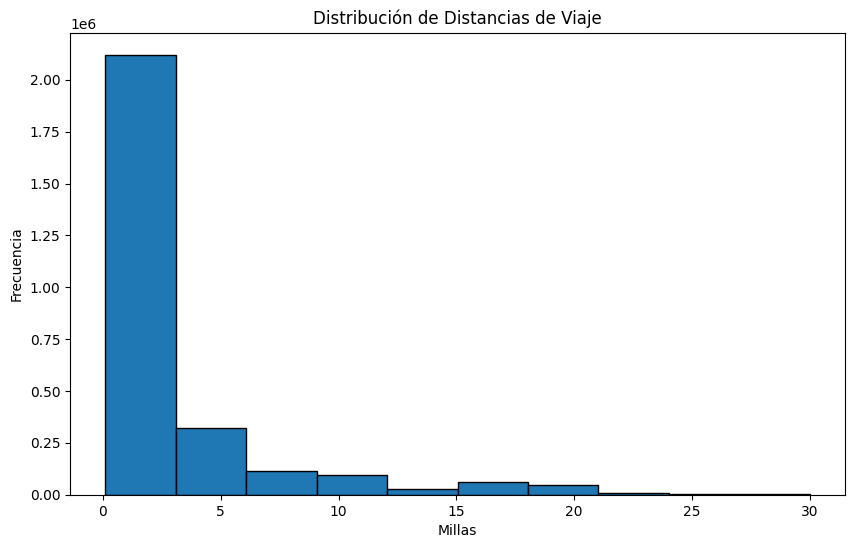

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Seleccionamos la columna y calculamos el histograma (ej. 10 bins)
# Esto devuelve: (bordes de los bins, conteos)
bins, counts = df_limpio.select("trip_distance").rdd.flatMap(lambda x: x).histogram(10)

# 2. Graficamos manualmente con Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], counts, width=np.diff(bins), edgecolor='black', align='edge')
plt.title("Distribución de Distancias de Viaje")
plt.xlabel("Millas")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
from pyspark.sql.functions import desc, lit, round, avg

total_count = df_limpio.count()
viajes_por_dia = df_limpio.groupBy("dia_semana_nombre") \
    .count() \
    .withColumnRenamed("count", "total_viajes") \
    .withColumn("proporcion", col("total_viajes") / lit(total_count))

viajes_ordenados = viajes_por_dia.orderBy(desc("proporcion"))

viajes_final = viajes_ordenados.withColumn( "porcentaje", round(col("proporcion") * 100, 2))
viajes_final.select("dia_semana_nombre", "total_viajes", "porcentaje").show()



+-----------------+------------+----------+
|dia_semana_nombre|total_viajes|porcentaje|
+-----------------+------------+----------+
|         Thursday|      498188|     17.75|
|           Friday|      473074|     16.85|
|        Wednesday|      465834|      16.6|
|         Saturday|      385269|     13.73|
|          Tuesday|      373533|     13.31|
|           Sunday|      309016|     11.01|
|           Monday|      302113|     10.76|
+-----------------+------------+----------+



In [63]:
#Fare promedio por día
analisis_rentabilidad = df_limpio.groupBy("dia_semana_nombre") \
    .agg(
        avg("fare_amount").alias("promedio_tarifa"),
        avg("fare_per_mile").alias("promedio_tarifa_por_milla"))

analisis_final = analisis_rentabilidad.select( "dia_semana_nombre", round("promedio_tarifa", 2).alias("fare_avg"),
round("promedio_tarifa_por_milla", 2).alias("fare_per_mile_avg")).orderBy(desc("fare_avg"))

analisis_final.show()

+-----------------+--------+-----------------+
|dia_semana_nombre|fare_avg|fare_per_mile_avg|
+-----------------+--------+-----------------+
|           Monday|   21.53|             9.51|
|           Sunday|   18.29|             7.38|
|         Thursday|   17.93|              8.3|
|           Friday|   17.81|             8.15|
|        Wednesday|   17.66|             8.22|
|          Tuesday|   17.36|             8.25|
|         Saturday|   16.93|             7.97|
+-----------------+--------+-----------------+



In [62]:
df_consolidado = viajes_final.join(analisis_final, on="dia_semana_nombre", how="inner")
df_consolidado.show()

+-----------------+------------+-------------------+----------+--------+-----------------+
|dia_semana_nombre|total_viajes|         proporcion|porcentaje|fare_avg|fare_per_mile_avg|
+-----------------+------------+-------------------+----------+--------+-----------------+
|        Wednesday|      465834|0.16595280344649338|      16.6|   17.66|             8.22|
|          Tuesday|      373533|0.13307068296813676|     13.31|   17.36|             8.25|
|           Friday|      473074|0.16853204475767422|     16.85|   17.81|             8.15|
|         Thursday|      498188| 0.1774788771180327|     17.75|   17.93|              8.3|
|         Saturday|      385269|0.13725161888360887|     13.73|   16.93|             7.97|
|           Monday|      302113|0.10762739368021754|     10.76|   21.53|             9.51|
|           Sunday|      309016| 0.1100865791458365|     11.01|   18.29|             7.38|
+-----------------+------------+-------------------+----------+--------+-----------------+